<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# Logistic Regression on Telecom Churn Dataset

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Identification & Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Feature Engineering**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)<br>
  - **7.2** [**Post Profiling Report**](#Section72)<br>
  - **7.3** [**Encoding the Categorical Data**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression - Baseline Model**](#Section81)<br>
  - **8.2** [**Using Trained Model for Prediction**](#Section82)<br>
  - **8.3** [**Logistic Regression - Model Evaluation**](#Section83)<br>

**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Introduction**
---
- Logistic regression is a techinque used for solving the __classification problem__.

- Classification is nothing but a problem of __identifying__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known.

- For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__


<a name = Section12></a>
### **1.1 Assumptions Logistic Regression**

- It assumes that there is **minimal**,or **no multi-collinearity** among the independent variables.
- It assumes that independent variables are **linearly related** to **log of odds**.
- It assumes that the **observations are independent** of each other.
- There is no **influential values(outliers)** in the **continous predictors(independent variables)**.

---
<a name = Section2></a>
# **2. Problem Statement**
---
- The Titanic dataset provides observations for each passenger and the survival outcome. 

- The goal of this case study is to **predict survival** of passenger travelling in RMS **Titanic** using **Logistic Regression** given the features such as *passenger class*, *sex*, *fair*, *age*, *number of siblings/spouse aboard*, *number of parents/children aboard*, and *others*.

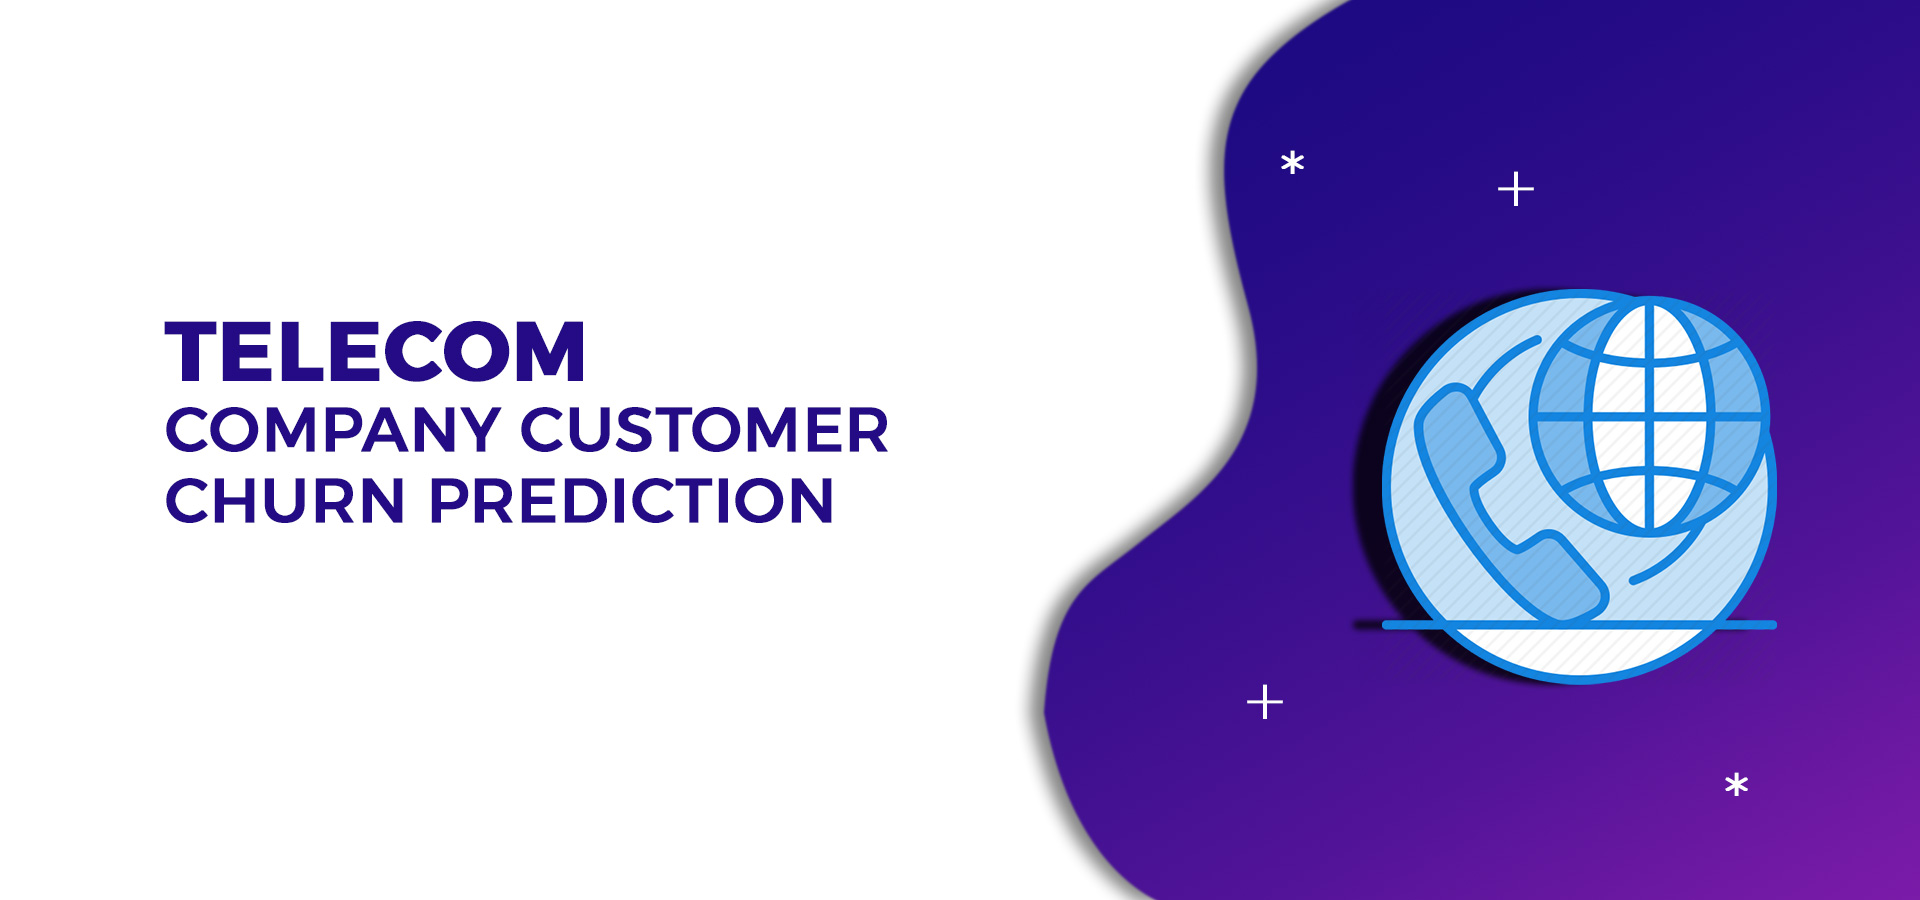



---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
#!pip install -q --upgrade yellowbrick
#!pip install opendatasets --upgrade --quiet            
#!pip install pandas-profiling==3.2.0
#!pip install visions==0.7.4
#!pip install markupsafe==2.0.1 

<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of the information about people boarding the Telecom churn Prediction . Various variables present in the dataset includes data of customerID,gender etc. 
- The Train dataset comprises of __5634 observations of 20 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| CustomerID   | Passenger Identity                                        | 
| Gender      | Whether the customer is a male or a female                         |  
| SeniorCitizen        | Whether the customer is a senior citizen or not (1, 0) | 
| Partner          | Whether the customer has a partner or not (Yes, No)|   
| Dependents           | Whether the customer has dependents or not (Yes, No)|
| Tenure           | Number of months the customer has stayed with the company |
| PhoneService         | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines         | Whether the customer has multiple lines or not (Yes, No, No phone service)|
| InternetService        |Customer’s internet service provider (DSL, Fiber optic, No)  |
| OnlineSecurity          |Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup         |Whether the customer has online backup or not (Yes, No, No internet service)|
| DeviceProtection        |Whether the customer has device protection or not (Yes, No, No internet service)|
| TechSupport          |Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV        |Whether the customer has streaming TV or not (Yes, No, No internet service)|
| StreamingMovies          |Whether the customer has streaming movies or not (Yes, No, No internet service)|
| Contract         |The contract term of the customer (Month-to-month, One year, Two year)|
| PaperlessBilling        |Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod          |	The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
| MonthlyCharges         |The amount charged to the customer monthly|
| TotalCharges          |The total amount charged to the customer |
| Churn         |Whether the customer churned or not (Yes or No)|


In [4]:
telecom_train_df  =pd.read_csv("Churn_train.csv")

In [5]:
telecom_train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
print("Shape of our Data is :", telecom_train_df.shape)

Shape of our Data is : (5634, 21)


In [7]:
telecom_train_df.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**Observation:**

- There are **NO null values present**.

- **Each feature** seems to have **correct data type** excep for churn we have to change it to int64.

In [8]:
#telecom_train_df["Churn"] = telecom_train_df["Churn"].astype = int

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [9]:
telecom_train_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.00000,5634.00000,5634.00000
mean,0.16187,32.27796,64.77913
std,0.36837,24.55521,30.10499
min,0.00000,0.00000,18.25000
25%,0.00000,9.00000,35.40000
50%,0.00000,29.00000,70.37500
75%,0.00000,55.00000,89.85000
max,1.00000,72.00000,118.65000


**Observation:**

- The **average** MonthlyCharges amount of the people was about 70.69198.

- **Average** tenure seems to be  about 2-3 years. Where, the **Max** age was 6 years.

In [10]:
telecom_train_df['Churn'] = np.where(telecom_train_df['Churn']=='Yes',1,0)

In [11]:
telecom_train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,0
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,1
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,0
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,0
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,0


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [12]:
profile = ProfileReport(df = telecom_train_df)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

**Observation:**


- Reports shows that the **number of variables**	in our data is **21**.

- **Number of observations(rows)** is	1409

- **Duplicate rows** are **0**

- **Missing cells** are **0**


- For full details checkout the report.

<a name = Section52></a>
### **5.1 Identification & Handling of Missing Data**

- In this section we will **analyze** and **identify** **missing information** such as **null data** and **zero data**.

In [13]:
#Creating a New dataframe
missing_frame = pd.DataFrame(index = telecom_train_df.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = telecom_train_df.isnull().sum().values

#Calculating the percentage of null values
nullpercent = telecom_train_df.isnull().sum().values/telecom_train_df.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = telecom_train_df[telecom_train_df == 0].count().values

#Calculating the Percentage of Zero
zero_percent = telecom_train_df[telecom_train_df == 0].count().values / telecom_train_df.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zero Frequency,0.00000,0.00000,4722.00000,0.00000,0.00000,8.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4113.00000
Missing %age,0.00000,0.00000,83.81000,0.00000,0.00000,0.14000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,73.00000


- We have no missing value
- the no of zeros in Gender signify that **0 means  Not a senior citizen**

In [14]:
telecom_train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,0
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,1
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,0
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,0
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,0


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

## Univarient Analysis.

#### Q1. What are the total no of people who churned or not .

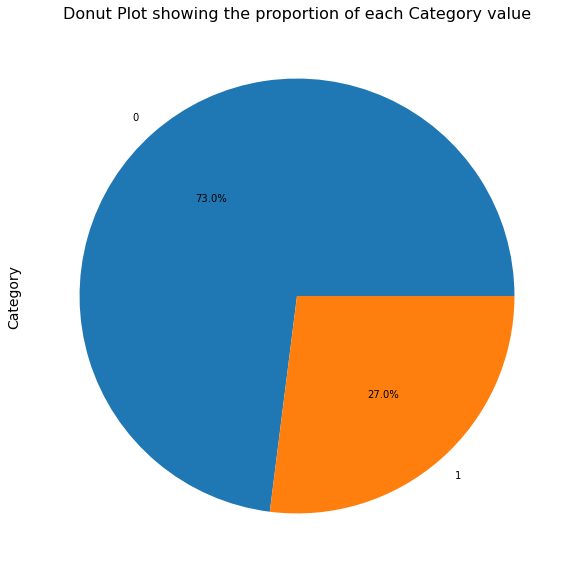

In [15]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[10, 10])

# Using magic of pandas pie() function
telecom_train_df['Churn'].value_counts().plot(kind = 'pie', autopct='%3.1f%%')

plt.ylabel(ylabel='Category', size=14)
plt.title(label='Donut Plot showing the proportion of each Category value', size=16)
plt.show()

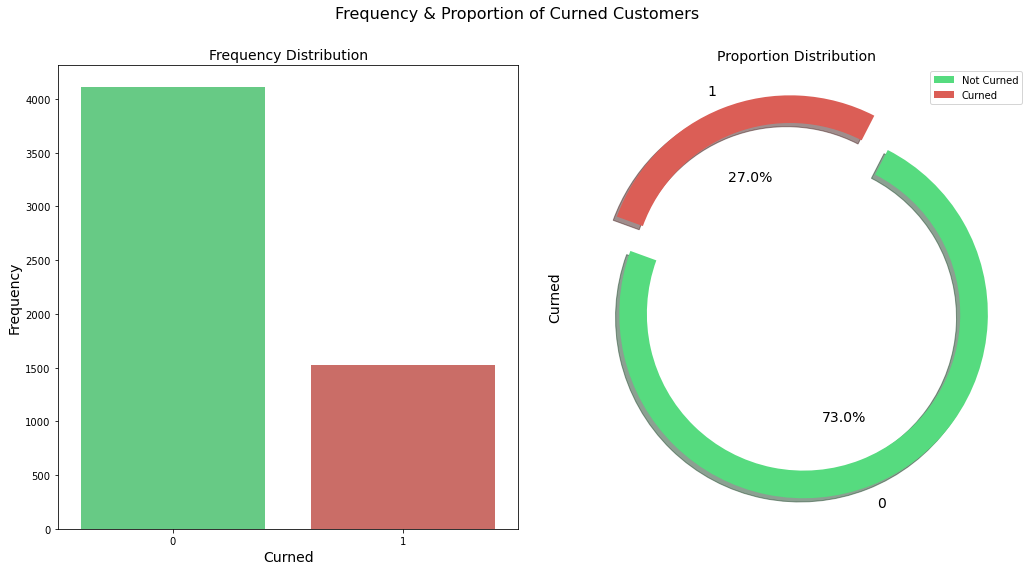

In [16]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'Churn', data = telecom_train_df, palette = ['#56DB7F','#DB5E56'])
plt.xlabel(xlabel = 'Curned', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
telecom_train_df['Churn'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#56DB7F','#DB5E56'])
plt.legend(['Not Curned', 'Curned'])
plt.ylabel(ylabel = 'Curned', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)                    
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Curned Customers', y = 1.02, size = 16)
plt.show()

**Observation:**

- We can observe that there are lesser number of people that **Churned**.

- Additionally, we can **observe class imbalance** in our data set.

- This might pose a **big problem** while **performing model building**, but we **will see what we can do**.

#### Q2. Which Gender base is more in our telecom.

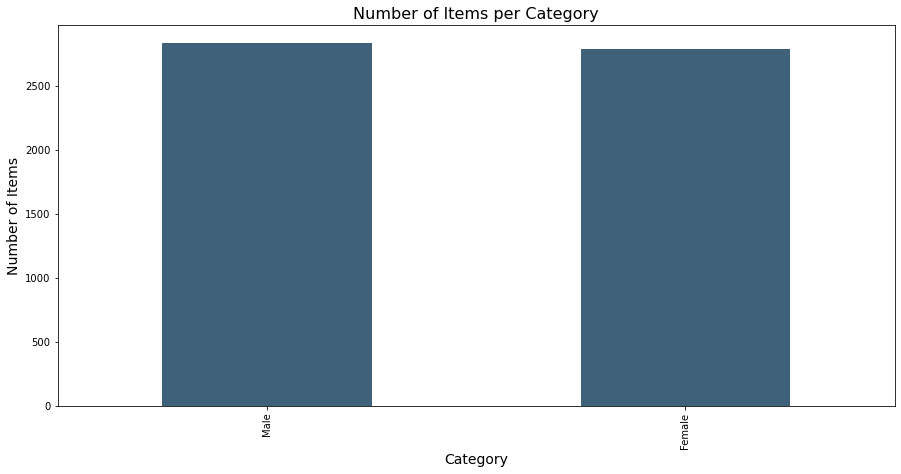

In [17]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas bar function
(telecom_train_df['gender'].value_counts()).plot.bar(color='#3F617A')

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Number of Items', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Number of Items per Category', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

In [18]:
telecom_train_df['gender'].value_counts()

Male      2838
Female    2796
Name: gender, dtype: int64

- Males are slightly more then that of Female Customers 

#### Q3. histogram for revenue collected.

In [19]:
def plotHistChart(data=None, column=None, bins=10, xlabel=None):
  """Creates histogram chart depicting frequency distribution of numerical features."""

  # Create a figure size of 15 X 7 inches.
  figure = plt.figure(figsize=[15, 7])

  # Using .hist() function to pass the labels and values.
  plt.hist(x=data[column], color='blue', alpha=0.6)

  # Set x, y labels of size 14 and title label of size 16.
  plt.xlabel(xlabel=xlabel, size=14)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Frequency Distribution of '+column, size=16)

  # Display the output
  plt.show()

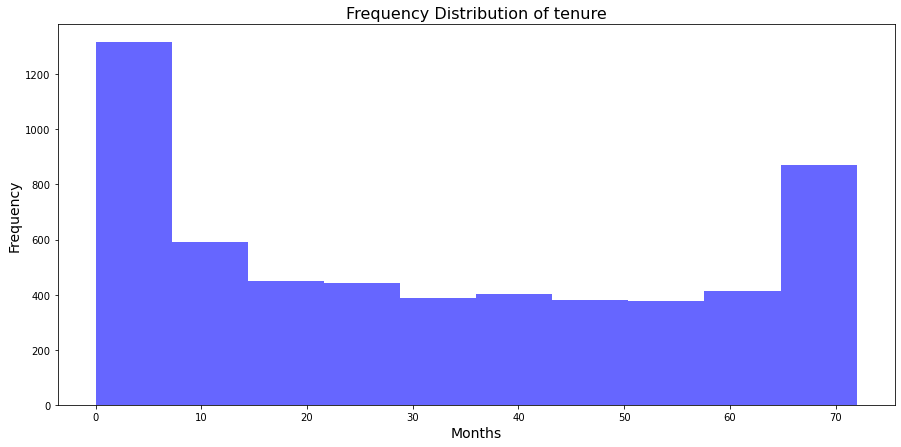

In [20]:
plotHistChart(data=telecom_train_df, column='tenure', xlabel='Months')

- Most of the customers with telecom are from 1-8 months

# Multivariate analysis

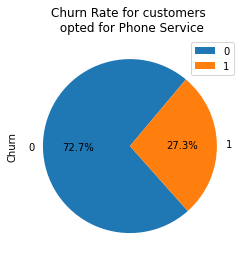

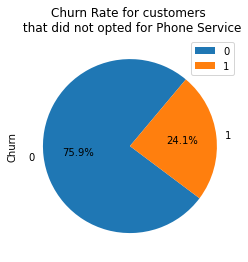

In [21]:
pie_PhoneService_Yes = pd.DataFrame(telecom_train_df[telecom_train_df['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(telecom_train_df[telecom_train_df['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

Q Churn rate pf customers having month-to-month basis vs 1ye vs 2 yr contract Churn Rate?

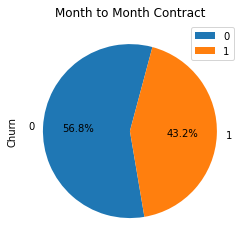

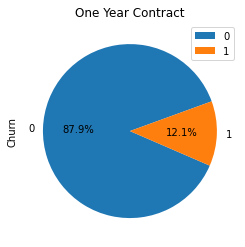

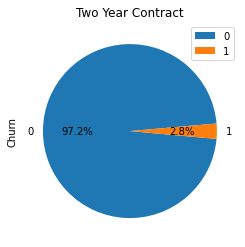

In [22]:
pie_Contract_m2m = pd.DataFrame(telecom_train_df[telecom_train_df['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom_train_df[telecom_train_df['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom_train_df[telecom_train_df['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.

<a name = Section71></a>
### **7.1 Feature Selection**

- Here we will **visualize  the correlation** of input features **using Heatmap**.
- If we see a case of correlation we will **remove the highly correlated feature**.

Text(0.5, 1.0, 'Correlation between features')

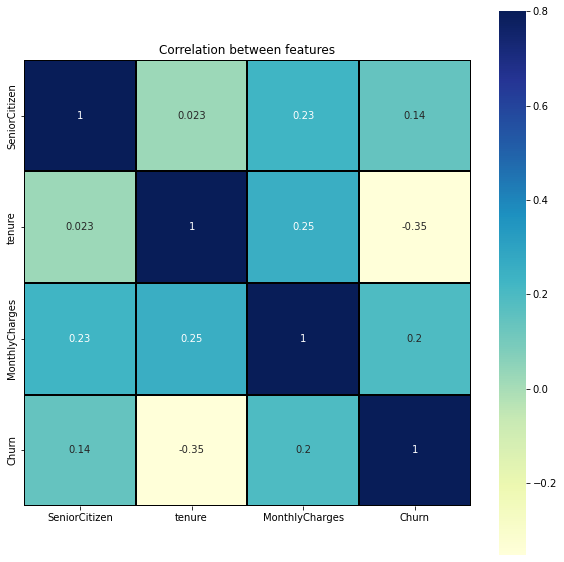

In [25]:
corr = telecom_train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation:** 

- Tenure is negatively corelated with Churned.
- With high corelation we face __redundancy__ issues.
- There is No such strong relation b/w the features.
- Monthly Chargeshave some correlation with the churn or not.
- Decreasing Monthly charges or giving some discount coupons to loyal customers can reduces churn chances.

<a name = Section72></a>
### **7.2 Post-Profiling Report**

- After doing **missing value Imputation**, **feature engineering**, **Removing unwanted features** we will now look at the report again.

In [26]:
profile = ProfileReport(df = titanic_data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

In [27]:
telecom_train_df = telecom_train_df.drop(['Partner','Dependents','PaperlessBilling','PhoneService','PaymentMethod','TotalCharges'], axis = 1)
telecom_train_df.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,5442-PPTJY,Male,0,12,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.70000,0
1,6261-RCVNS,Female,0,42,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,73.90000,1
2,2176-OSJUV,Male,0,71,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,65.15000,0
3,6161-ERDGD,Male,0,71,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,85.45000,0
4,2364-UFROM,Male,0,30,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,70.40000,0


<a name = Section73></a>
### **7.3 Encoding Categorical Features**

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
def encode(df):
  le = LabelEncoder()
  df['gender'] = le.fit_transform(df['gender'])
  df['SeniorCitizen'] = le.fit_transform(df['SeniorCitizen'])
  df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
  df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
  df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
  df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
  df['TechSupport'] = le.fit_transform(df['TechSupport'])
  df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
  df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
  df['InternetService'] = le.fit_transform(df['InternetService'])
  df['Contract'] = le.fit_transform(df['Contract'])
  return df

In [30]:
telecom_train_df = encode(telecom_train_df)

In [31]:
telecom_train_df.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,5442-PPTJY,1,0,12,0,2,1,1,1,1,1,1,2,19.70000,0
1,6261-RCVNS,0,0,42,0,0,2,2,2,2,0,2,1,73.90000,1
2,2176-OSJUV,1,0,71,2,0,2,2,0,2,0,0,2,65.15000,0
3,6161-ERDGD,1,0,71,2,0,2,0,2,2,2,2,1,85.45000,0
4,2364-UFROM,1,0,30,0,0,2,2,0,2,2,0,1,70.40000,0


In [32]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   int32  
 2   SeniorCitizen     5634 non-null   int64  
 3   tenure            5634 non-null   int64  
 4   MultipleLines     5634 non-null   int32  
 5   InternetService   5634 non-null   int32  
 6   OnlineSecurity    5634 non-null   int32  
 7   OnlineBackup      5634 non-null   int32  
 8   DeviceProtection  5634 non-null   int32  
 9   TechSupport       5634 non-null   int32  
 10  StreamingTV       5634 non-null   int32  
 11  StreamingMovies   5634 non-null   int32  
 12  Contract          5634 non-null   int32  
 13  MonthlyCharges    5634 non-null   float64
 14  Churn             5634 non-null   int32  
dtypes: float64(1), int32(11), int64(2), object(1)
memory usage: 418.3+ KB


<a name = Section74></a>
### **7.4 Data Prepration.**

In [33]:
x = telecom_train_df.iloc[:,1:14]
y = telecom_train_df['Churn']

In [34]:
x.head()

,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges
0,1,0,12,0,2,1,1,1,1,1,1,2,19.70000
1,0,0,42,0,0,2,2,2,2,0,2,1,73.90000
2,1,0,71,2,0,2,2,0,2,0,0,2,65.15000
3,1,0,71,2,0,2,0,2,2,2,2,1,85.45000
4,1,0,30,0,0,2,2,0,2,2,0,1,70.40000


In [35]:
x.head()

,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges
0,1,0,12,0,2,1,1,1,1,1,1,2,19.70000
1,0,0,42,0,0,2,2,2,2,0,2,1,73.90000
2,1,0,71,2,0,2,2,0,2,0,0,2,65.15000
3,1,0,71,2,0,2,0,2,2,2,2,1,85.45000
4,1,0,30,0,0,2,2,0,2,2,0,1,70.40000


In [36]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int32

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (4507, 13) (4507,)
Testing Data Shape: (1127, 13) (1127,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Score**.



<a name = Section81></a>

## **8.1 Logistic Regression - Baseline Model**

In [38]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

<a name = Section82></a>

## **8.2 Using Trained Model for Prediction**

In [39]:
#predicting on train data
y_pred_train = logreg.predict(x_train)

#predicting on test data
y_pred_test = logreg.predict(x_test)

In [40]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Churned','Actual Not churned']
confusion_matrix.columns = ['Predicted Churned','Predicted Not churned']
print(confusion_matrix)

                    Predicted Churned  Predicted Not churned
Actual Churned                    738                     85
Actual Not churned                145                    159


In [41]:
pred = logreg.predict(x_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred))

Accuracy score for test data is: 0.7959183673469388


<a name = Section83></a>

## **8.3 Logistic Regresion Model Evaluation**

In [42]:
telecom_test_df  =pd.read_csv("Churn_test.csv")

In [43]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [44]:
telecom_test_df = telecom_test_df.drop(['Partner','Dependents','PaperlessBilling','PhoneService','PaymentMethod','TotalCharges'], axis = 1)
telecom_test_df.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges
0,8879-ZKJOF,Female,0,41,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,79.85000
1,0201-MIBOL,Female,1,66,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,102.40000
2,1600-DILPE,Female,0,12,No,DSL,No,No,No,No,No,No,Month-to-month,45.00000
3,8601-QACRS,Female,0,5,Yes,DSL,No,No,No,No,No,No,Month-to-month,50.60000
4,7919-ZODZZ,Female,0,10,No,DSL,No,Yes,Yes,No,No,Yes,One year,65.90000


In [45]:
telecom_test_df = encode(telecom_test_df)

In [46]:
telecom_test_df.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges
0,8879-ZKJOF,0,0,41,0,0,2,0,2,2,2,2,1,79.85000
1,0201-MIBOL,0,1,66,2,1,2,0,0,0,2,2,2,102.40000
2,1600-DILPE,0,0,12,0,0,0,0,0,0,0,0,0,45.00000
3,8601-QACRS,0,0,5,2,0,0,0,0,0,0,0,0,50.60000
4,7919-ZODZZ,0,0,10,0,0,0,2,2,0,0,2,1,65.90000


In [47]:
x_test_val = telecom_test_df.iloc[:,1:]

In [48]:
x_test_val.head()

,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges
0,0,0,41,0,0,2,0,2,2,2,2,1,79.85000
1,0,1,66,2,1,2,0,0,0,2,2,2,102.40000
2,0,0,12,0,0,0,0,0,0,0,0,0,45.00000
3,0,0,5,2,0,0,0,0,0,0,0,0,50.60000
4,0,0,10,0,0,0,2,2,0,0,2,1,65.90000


In [49]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   int32  
 2   SeniorCitizen     1409 non-null   int64  
 3   tenure            1409 non-null   int64  
 4   MultipleLines     1409 non-null   int32  
 5   InternetService   1409 non-null   int32  
 6   OnlineSecurity    1409 non-null   int32  
 7   OnlineBackup      1409 non-null   int32  
 8   DeviceProtection  1409 non-null   int32  
 9   TechSupport       1409 non-null   int32  
 10  StreamingTV       1409 non-null   int32  
 11  StreamingMovies   1409 non-null   int32  
 12  Contract          1409 non-null   int32  
 13  MonthlyCharges    1409 non-null   float64
dtypes: float64(1), int32(10), int64(2), object(1)
memory usage: 99.2+ KB


In [50]:
pred_val = logreg.predict(x_test_val)

In [51]:
pred_val

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
telecom_test_df["Churn"] = pred_val

In [53]:
telecom_test_df.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,8879-ZKJOF,0,0,41,0,0,2,0,2,2,2,2,1,79.85000,0
1,0201-MIBOL,0,1,66,2,1,2,0,0,0,2,2,2,102.40000,0
2,1600-DILPE,0,0,12,0,0,0,0,0,0,0,0,0,45.00000,0
3,8601-QACRS,0,0,5,2,0,0,0,0,0,0,0,0,50.60000,1
4,7919-ZODZZ,0,0,10,0,0,0,2,2,0,0,2,1,65.90000,0


In [54]:
telecom_test_df["Churn"] = np.where(telecom_test_df["Churn"] == 1,"Yes","No")

In [55]:
telecom_test_df.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,8879-ZKJOF,0,0,41,0,0,2,0,2,2,2,2,1,79.85000,No
1,0201-MIBOL,0,1,66,2,1,2,0,0,0,2,2,2,102.40000,No
2,1600-DILPE,0,0,12,0,0,0,0,0,0,0,0,0,45.00000,No
3,8601-QACRS,0,0,5,2,0,0,0,0,0,0,0,0,50.60000,Yes
4,7919-ZODZZ,0,0,10,0,0,0,2,2,0,0,2,1,65.90000,No


In [56]:
fina_submission = telecom_test_df[['customerID','Churn']]

In [57]:
fina_submission.to_csv('fina_submission.csv',index= False,header=False)

In [58]:
fina_submission.shape

(1409, 2)

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to Churned and not Churned.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** which customer was about to churned and who did not.

- Using Logistic Regresion model our Accuracy came out to be 79%